Pada Notebook kali ini akan dibuat sebauh model pemrosesan bahasa alami dalam untuk mengklasifikasi korelasi antara sebuah Genres dengan Kategori dalam daftar aplikasi di Playstore.

Dataset [Link berikut](https://storage.googleapis.com/kaggle-data-sets/49864%2F274957%2Fcompressed%2Fgoogleplaystore.csv.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1596995923&Signature=GWQ1kSauG1YDqslewKiLZeCEGGo8KkFuOrhybf%2BRQVPCjCyxRYBRF3VEHDt8vKbF6ZthaAzyfq3SPWwxZQbzx13OL9CxFkybIH0o%2BXn%2BdFUJv4dwjMV8hcZMaLFYuaqncFUzBSLY0CdlzMoTGkTfuZYbvGvPGTcJvM9SRZRO0qEB10WWfQls3Br2eeap6g6bfPBLSzhexDOPYxMKI57yQ8Lxu9nzrdTDXfq3ve50jA3emkxcarVbrMiWdcOGkG2IEIbNdAkmGjv%2B34LEK7bRF54FcjKh1d7qfx34n7RaK20YZOPSfaIehrUdIPJqsRa0%2Fvn3aTrkY9OEQSyC6S4fNg%3D%3D)


Langkah pertama yang perlu dilakukan adalah mengimport library yang diperlukan.

In [1]:
import pandas as pd

Setelah itu muat file datasets kedalam panda Datframe dengan perintah berikut.

In [2]:
df = pd.read_csv('googleplaystore.csv')

Kita perlu melakukan identifikasi terlebih dahulu mengenai datasets dengan perintah berikut, akan ditampilkan ringkasan mengenai dataset.

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Lalu kita perlu melakukan cek mengenai unique value yang ada pada sebuah columns di dataframe, hal ini berguna nanti saat model di FIT ke JST.

In [4]:
print(len(df['Category'].unique()))
print(df['Category'].unique())

34
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


Selain itu kita perlu memastikan datasets kita adalah dataset yang bersih (clean), maksudnya dataset kita tidak memiliki nilai null atau nan, hal ini penting karena nilai-nilai tersebut akan memperngaruhi akurasi dari model kita. 

Apabila outputnya adalah 0 maka data kita tidak memiliki value yang null atau nan.

In [5]:
df['Category'].isna().sum()

0

Lalu kita perlu melakukan cek mengenai unique value yang ada pada sebuah columns di dataframe, untuk ini akan digunakan sebagai pembanding.

In [6]:
print(len(df['Genres'].unique()))
df['Genres'].unique()

120


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [7]:
category = pd.get_dummies(df['Category'])
df_baru = pd.concat([df, category],axis=1)
df_baru = df_baru.drop(columns=['Category','App','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Last Updated','Current Ver','Android Ver'])
df_baru

,Genres,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,Art & Design,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Art & Design;Pretend Play,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Art & Design,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Art & Design,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Art & Design;Creativity,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Education,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10837,Education,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10838,Medical,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10839,Books & Reference,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Untuk mempermudah, kita pecah dataframe dengan column tertentu ke dalam sebuah dataframe baru.

In [8]:
genreApp = df_baru['Genres'].values
labelCategory = df_baru[['ART_AND_DESIGN','AUTO_AND_VEHICLES','BEAUTY','BOOKS_AND_REFERENCE','BUSINESS','COMICS','COMMUNICATION','DATING','EDUCATION','ENTERTAINMENT','EVENTS','FAMILY','FINANCE','FOOD_AND_DRINK','GAME','HEALTH_AND_FITNESS','HOUSE_AND_HOME','LIBRARIES_AND_DEMO','LIFESTYLE','MAPS_AND_NAVIGATION','MEDICAL','NEWS_AND_MAGAZINES','PARENTING','PERSONALIZATION','PHOTOGRAPHY','PRODUCTIVITY','SHOPPING','SOCIAL','SPORTS','TOOLS','TRAVEL_AND_LOCAL','VIDEO_PLAYERS','WEATHER']].values

Untuk meminimalisir Overfitting kita bagi dataframe dengan metod train test split.

Pembagian kali ini adalah : 80% untuk train dan 20% untuk test. 

In [9]:
from sklearn.model_selection import train_test_split
genreApp_latih, genreApp_test, labelCategory_latih, labelCategory_test = train_test_split(genreApp,labelCategory, test_size=0.2, random_state=32)

Lakukan cek apakah data sudah terbagi dengan benar.

In [10]:
print(len(genreApp_latih));
print(len(genreApp_test));
print(len(labelCategory_latih));
print(len(labelCategory_test));

8672
2169
8672
2169


Lalu kita lakukan Tokenisasi pada data.

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=500, oov_token='X')
tokenizer.fit_on_texts(genreApp_latih)
tokenizer.fit_on_texts(genreApp_test)

sekuens_latih = tokenizer.texts_to_sequences(genreApp_latih)
sekuens_test = tokenizer.texts_to_sequences(genreApp_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

Lalu kita buat model NLP nya. kita gunakan Dropout pada hidden layer pertama untuk meminimalisir terjadinya Overfittingm serta pada Dense dengan activation softmax kita isi nilai dengan jumlah yang sama pada columns di data dummy yang sudah kita difinisikan sebelumnya.

In [12]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=500, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(33,activation='softmax'),
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Lalu kita buat callbacks agar apabila akurasi telah mencapai nilai tertentu kita maka epochs akan otomatis terhenti, sehingga dapat menghemat waktu dan resources memory dan GPU.

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91 and logs.get('val_accuracy')>0.91):
      print("\nAkurasi telah >90%! hentikan epochs!")
      self.model.stop_training = True
callbacks = myCallback()

Lalu kita fit model, dan tentukan epochs sebanyak 15 kali.

In [17]:
history = model.fit(padded_latih, labelCategory_latih, epochs = 15,
                     validation_data = (padded_test, labelCategory_test), verbose=2,callbacks=[callbacks])

Epoch 1/15
271/271 - 1s - loss: 0.8202 - accuracy: 0.7235 - val_loss: 0.5342 - val_accuracy: 0.8414
Epoch 2/15
271/271 - 1s - loss: 0.5166 - accuracy: 0.8190 - val_loss: 0.4614 - val_accuracy: 0.8681
Epoch 3/15
271/271 - 1s - loss: 0.3842 - accuracy: 0.8669 - val_loss: 0.3795 - val_accuracy: 0.9059
Epoch 4/15
271/271 - 1s - loss: 0.3019 - accuracy: 0.9081 - val_loss: 0.5477 - val_accuracy: 0.8243
Epoch 5/15
271/271 - 1s - loss: 0.2450 - accuracy: 0.9199 - val_loss: 0.3117 - val_accuracy: 0.9036
Epoch 6/15
271/271 - 1s - loss: 0.2120 - accuracy: 0.9309 - val_loss: 0.3493 - val_accuracy: 0.8557
Epoch 7/15

Akurasi telah >90%! hentikan epochs!
271/271 - 1s - loss: 0.1934 - accuracy: 0.9358 - val_loss: 0.2439 - val_accuracy: 0.9175


Lalu kita perlu untuk melakukan visualisasi akurasi model/ 

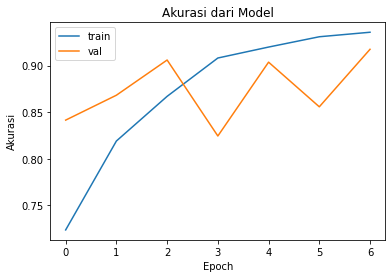

In [18]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi dari Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()